# Predicting NIFTY 50 USING LSTM MODEL

## The Nifty is the flagship benchmark of the National Stock Exchange (NSE), which is a well-diversified index, comprising top 50 companies in terms of free-float market capitalisation that are traded on the bourse. It is supposed to reflect the health of the listed universe of Indian companies, and hence the broader economy, in all market conditions

In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
!pip install nsepy

In [3]:
from nsepy import get_history
from datetime import date
data=get_history(symbol="NIFTY",start=date(2016,9,15),end=date(2021,9,17),index=True)

In [4]:
data.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2016-09-15,8743.85,8751.95,8704.35,8742.55,149889703,7.347340e+10
2016-09-16,8780.85,8847.65,8750.50,8779.85,274039556,1.443063e+11
2016-09-19,8788.45,8824.30,8774.20,8808.40,135814177,7.364640e+10
2016-09-20,8816.10,8816.45,8759.30,8775.90,140718486,7.035070e+10
2016-09-21,8790.30,8826.85,8757.30,8777.15,153441330,7.572410e+10


In [5]:
data.shape

(1241, 6)

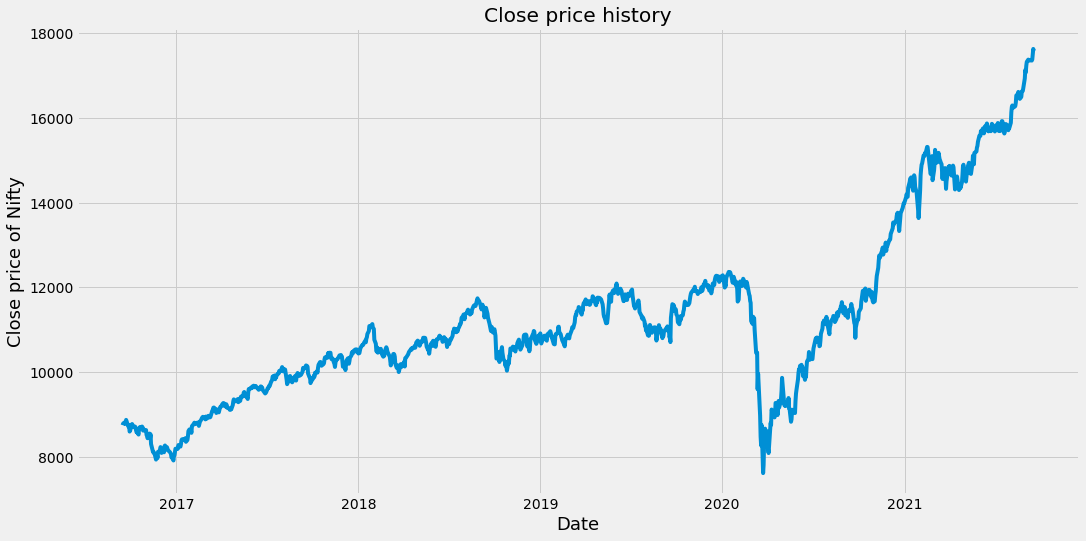

In [6]:
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(data["Close"])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price of Nifty',fontsize=18)
plt.show()

In [7]:
close=data.filter(["Close"])

In [8]:
dataset=close.values

In [9]:
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

993

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [11]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.11301245, 0.11673528, 0.1195848 , 0.11634104, 0.1164658 ,
       0.12547845, 0.12189535, 0.1110662 , 0.1094044 , 0.11327195,
       0.09791152, 0.0998977 , 0.11256831, 0.11566734, 0.11315218,
       0.10971879, 0.10852609, 0.10964394, 0.09612496, 0.09712803,
       0.09084013, 0.10655987, 0.10468348, 0.10870574, 0.10807196,
       0.10965891, 0.1078973 , 0.10030691, 0.10030691, 0.10257754,
       0.1013499 , 0.1014048 , 0.09020136, 0.08730194, 0.08219178,
       0.08850962, 0.09315068, 0.08201712, 0.0913741 , 0.06847319,
       0.04972428, 0.05003868, 0.04687976, 0.04629588, 0.03182374,
       0.03912968, 0.04222372, 0.03545675, 0.05030816, 0.05156574,
       0.05308781, 0.06130698, 0.05815306, 0.04756344, 0.05175038,
       0.05318761, 0.04908551, 0.06353769, 0.06502483, 0.0559473 ])]
[0.0610375028070963]

[array([0.11301245, 0.11673528, 0.1195848 , 0.11634104, 0.1164658 ,
       0.12547845, 0.12189535, 0.1110662 , 0.1094044 , 0.11327195,
       0.09791152, 0.0998977 , 0.112

In [12]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [13]:
x_train.shape

(933, 60, 1)

In [14]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [16]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

933/933 [==============================] - 11s 12ms/step - loss: 0.0013


In [17]:
test_data=scaled_data[training_data_len-60:,:]

In [18]:
test_data=scaled_data[training_data_len-60:,:]
#create the data sets x_test,y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [19]:
x_test=np.array(x_test)

In [20]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [21]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [22]:
from sklearn.metrics import r2_score
print(f"Accuracy:-{r2_score(predictions,y_test)}")
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse
      

Accuracy:-0.9544851895527813


247.09852964339717

<ipython-input-23-81dffc3444e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"]=predictions


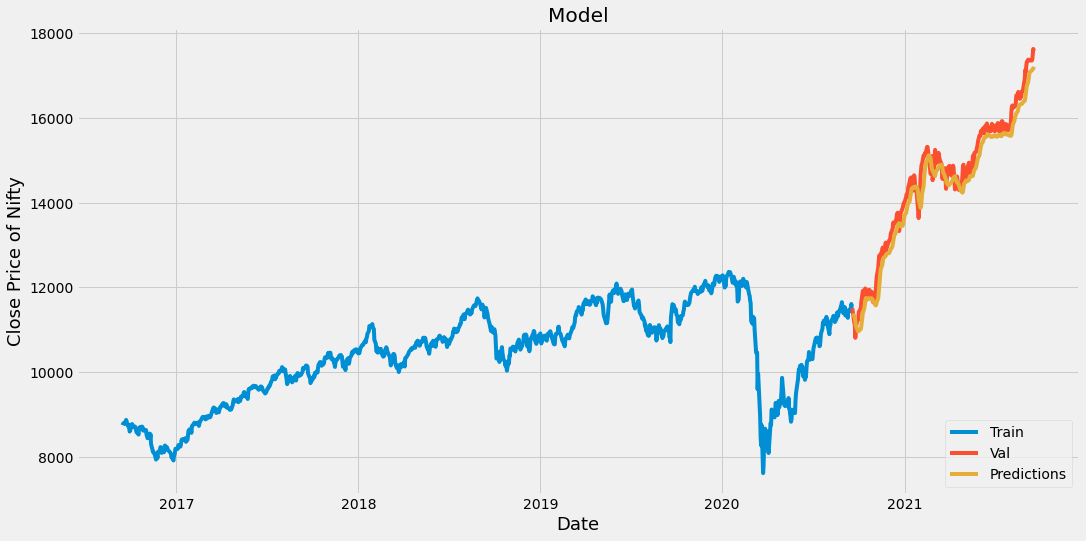

In [23]:
#Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid["Predictions"]=predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price of Nifty',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[["Close","Predictions"]])
plt.legend(['Train',"Val","Predictions"],loc="lower right")

In [24]:
nifty_quote = get_history(symbol="NIFTY", start=date(2016,9,15), end=date(2021,9,17),index=True)

In [25]:
new_df=nifty_quote.filter(['Close'])

In [26]:
last_60_days=new_df[-60:].values

In [27]:
last_60_days_scaled=scaler.transform(last_60_days)


In [28]:
X_test=[]
X_test.append(last_60_days_scaled)

In [29]:
X_test=np.array(X_test)

In [30]:
#Get the predicted scaled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[17248.902]]
